In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a1 = tf.Variable(tf.truncated_normal(shape = [1],mean = 0, stddev = 1))
b1 = tf.Variable(tf.truncated_normal(shape = [1],mean = 0, stddev = 1))

x = tf.placeholder(tf.float32 , shape = [1])
y_ = tf.placeholder(tf.float32 , shape = [1])

y = tf.add(tf.multiply(a1,x), b1)

train_x = np.arange(1,1000,1.0)
train_y = np.arange(1,1000,1.0)

loss = tf.losses.mean_squared_error(y, y_)
optimi = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

aver = tf.train.ExponentialMovingAverage(0.999)
average_op = aver.apply(tf.trainable_variables())

with tf.control_dependencies([optimi, average_op]):
    train_op = tf.no_op()

result_v = []
result_a = []
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    result_a.append(sess.run(a1))
    step = 10000
    print(sess.run(a1))
    for i in range(step):
        x_t = train_x[i % 5]
        y_t = train_y[i % 5]
        sess.run(train_op, feed_dict = {x : [x_t], y_ : [y_t]})
        
        result_a.append(sess.run(a1))
        v1 = aver.average(a1)
        result_v.append(sess.run(v1))
    
    print(sess.run(a1),sess.run(b1))
# writer = tf.summary.FileWriter('./graph', sess.graph)

[-0.16123527]
[0.98945576] [0.038633]


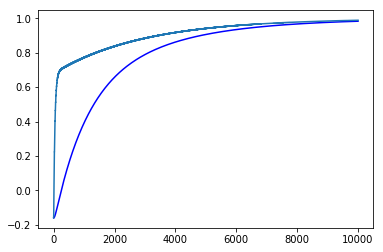

In [4]:
x = range(len(result_v))
plt.plot(x,result_v,'-',c = 'b')
plt.plot(x,result_a[1:],'-')

In [6]:
# result_v

In [7]:
# result_a

In [8]:
ans = []
for i, v_i in enumerate(result_v):
    ans.append(result_v[i] * 0.999 + 0.001 * result_a[i + 1])

In [9]:
ans[-2:]

[array([0.98382616], dtype=float32), array([0.98383176], dtype=float32)]

In [11]:
result_v[-2:]

[array([0.9838207], dtype=float32), array([0.98382616], dtype=float32)]